In [31]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', color_codes=True)

In [32]:
data=pd.read_csv('/content/ortho_knnnb.csv')

In [33]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [34]:
data.shape

(310, 7)

This data is about Orthopedics and bone measurements


We will look at all these parameters and predict if it falls under normal or abnormal class.

In [35]:
data.groupby('class').mean()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572


In [36]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


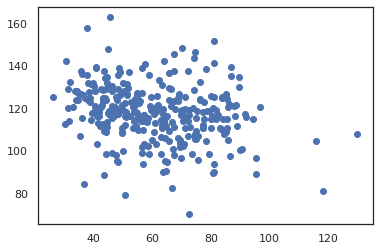

In [37]:
plt.scatter(data['pelvic_incidence'],data['pelvic_radius'])

In [38]:
corr=data.corr()

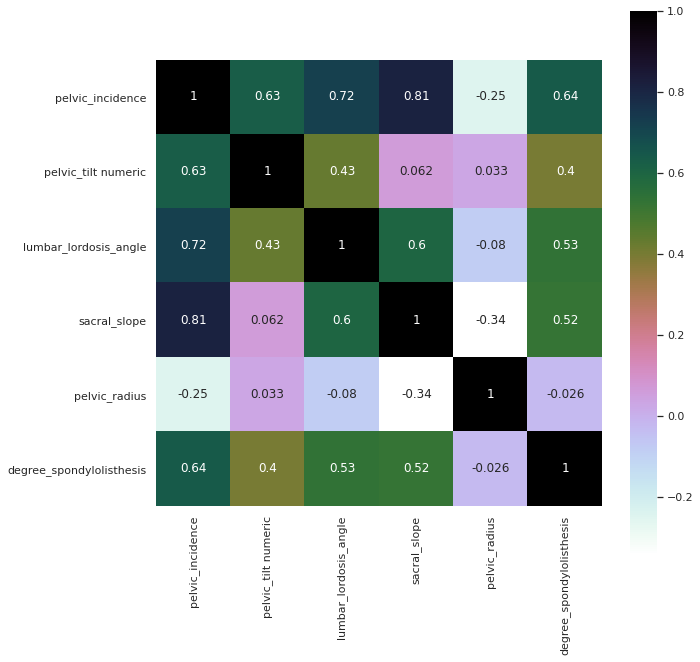

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [40]:
corr[abs(corr)>=0.5]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,NaN,0.638743
pelvic_tilt numeric,0.629199,1.000000,NaN,NaN,NaN,NaN
lumbar_lordosis_angle,0.717282,NaN,1.000000,0.598387,NaN,0.533667
sacral_slope,0.814960,NaN,0.598387,1.000000,NaN,0.523557
pelvic_radius,NaN,NaN,NaN,NaN,1.0,NaN
degree_spondylolisthesis,0.638743,NaN,0.533667,0.523557,NaN,1.000000


In [41]:
data.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [42]:
data.corr

<bound method DataFrame.corr of      pelvic_incidence  pelvic_tilt numeric  ...  degree_spondylolisthesis     class
0           63.027818            22.552586  ...                 -0.254400  Abnormal
1           39.056951            10.060991  ...                  4.564259  Abnormal
2           68.832021            22.218482  ...                 -3.530317  Abnormal
3           69.297008            24.652878  ...                 11.211523  Abnormal
4           49.712859             9.652075  ...                  7.918501  Abnormal
..                ...                  ...  ...                       ...       ...
305         47.903565            13.616688  ...                 -4.245395    Normal
306         53.936748            20.721496  ...                 -0.421010    Normal
307         61.446597            22.694968  ...                 -2.707880    Normal
308         45.252792             8.693157  ...                  0.214750    Normal
309         33.841641             5.073991  

In [43]:
  data1=data
  dummies =pd.get_dummies(data['class'],drop_first=False)
  data1 = pd.concat([data,dummies],axis='columns')

In [44]:
data1

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Abnormal,Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal,1,0
...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal,0,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal,0,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal,0,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal,0,1


In [45]:
data1.rename(columns={'Abnormal':'symptom_class'},inplace=True)

In [47]:
data_set=data1.drop('class',axis=1,inplace=True)

In [48]:
data_set=data1.drop('Normal',axis=1,inplace=True)

In [53]:
data1


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


In [56]:
data1.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,symptom_class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [55]:
x=data1.drop(['symptom_class'],axis=1)
x

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [57]:
y=data1.iloc[:,6]
y

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: symptom_class, Length: 310, dtype: uint8

In [58]:
from sklearn import preprocessing

In [60]:
normalized_x=preprocessing.normalize(x)

In [61]:
normalized_x

array([[ 0.47747441,  0.17084969,  0.30006338,  0.30662473,  0.74750793,
        -0.00192724],
       [ 0.30683541,  0.07904018,  0.19652338,  0.22779523,  0.89878075,
         0.03585728],
       [ 0.47319951,  0.1527454 ,  0.34436881,  0.32045411,  0.72861603,
        -0.02426987],
       ...,
       [ 0.39893156,  0.14734321,  0.29975311,  0.25158834,  0.81589576,
        -0.01758045],
       [ 0.32622463,  0.06266844,  0.29977024,  0.26355619,  0.85458978,
         0.00154812],
       [ 0.24745062,  0.03710111,  0.26792128,  0.21034951,  0.9062896 ,
        -0.00145691]])

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(normalized_x,y,test_size=0.20,random_state=1)

In [66]:
print(x_train.shape)
print(y_train.shape)


(248, 6)
(248,)


In [68]:
print(x_test.shape)
print(y_test.shape)

(62, 6)
(62,)


In [84]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [85]:
pred=KNN.predict(x_test)
pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [86]:
#validation of built model
from sklearn.metrics import accuracy_score
print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,y_test)*100,2)))

The accuracy of the KNN with K=3 is 80.65%


In [88]:
from sklearn.naive_bayes import GaussianNB
nvclassifier= GaussianNB()
nvclassifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
y_pred=nvclassifier.predict(x_test)

In [90]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=uint8)

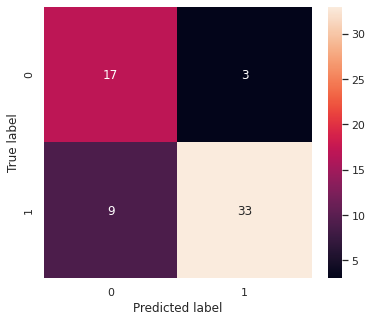

In [91]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [92]:
a=cm.shape
corrPred=0
falsePred=0
for row in range(a[0]):
  for c in range(a[1]):
    if row==c:
      corrPred +=cm[row,c]
    else:
      falsePred +=cm[row,c]
print('Correct predictions:',corrPred)
print('False predictions:',falsePred)  


Correct predictions: 50
False predictions: 12


In [93]:
acc=corrPred/cm.sum()
round(acc*100,2)

80.65

In [94]:
#finding accuracy from Sklearn.metrics
from sklearn.metrics import accuracy_score

print('The accuracy of the NB is {}%'.format(round(accuracy_score(y_pred,y_test)*100,2)))

The accuracy of the NB is 80.65%


In [95]:
#predicted_probabilities
nvclassifier.predict_proba(x_test)[:10]


array([[6.64540502e-06, 9.99993355e-01],
       [2.16811505e-01, 7.83188495e-01],
       [2.92697836e-11, 1.00000000e+00],
       [8.09801085e-05, 9.99919020e-01],
       [3.95285961e-07, 9.99999605e-01],
       [4.84867148e-05, 9.99951513e-01],
       [9.96027057e-01, 3.97294284e-03],
       [1.60820542e-14, 1.00000000e+00],
       [4.49163286e-16, 1.00000000e+00],
       [6.88830684e-03, 9.93111693e-01]])